In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
movable = np.array(
        [[1, 1, 1, 1],
         [1, 0, 1, 1],
         [1, 1, 1, 1]]
    ).astype(np.bool)

rewards = np.array(
        [[0, 0, 0, 1],
         [0, 0, 0, -100],
         [0, 0, 0, 0]]
    ).astype(np.float)

actions = np.array([
    {(0, 0): 1},
    {(0, -1): 0.8, (-1, 0): 0.1, (1, 0): 0.1},
    {(0, 1): 0.8, (-1, 0): 0.1, (1, 0): 0.1},
    {(-1, 0): 0.8, (0, -1): 0.1, (0, 1): 0.1}, 
    {(1, 0): 0.8, (0, -1): 0.1, (0, 1): 0.1}
])

action_label = np.array(['o', '<', '>', '^', 'v', ' '])
gamma = 0.8

In [3]:
def new_pos(pos, move):
    return tuple(np.array(pos) + np.array(move))

def valid_move(pos, move, movable):
    return new_pos(pos, move) in np.ndindex(value.shape) \
        and movable[new_pos(pos, move)]

def valid_pos(pos, movable):
    return movable[pos]

def action_value(pos, action, movable):
    return np.sum([
        value[new_pos(pos, move)] * probability
        for move, probability in action.items()
        if valid_move(pos, move, movable)
    ])

def calc_new_value(pos, value, movable):
    return rewards[pos] + gamma * np.max([
        action_value(pos, action, movable)
        for action in actions
        if valid_pos(pos, movable)
    ], initial=np.NINF)

[[   0.    0.    0.    1.]
 [   0.  -inf    0. -100.]
 [   0.    0.    0.    0.]]


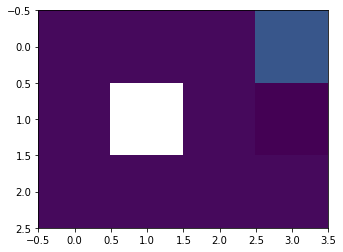

[[  0.     0.     0.64   1.8 ]
 [  0.     -inf   0.   -99.36]
 [  0.     0.     0.     0.  ]]


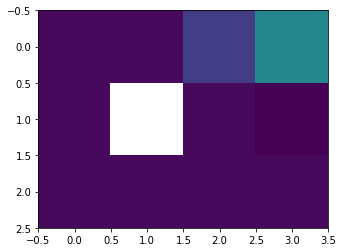

[[ 0.0000e+00  4.0960e-01  1.1520e+00  2.4400e+00]
 [ 0.0000e+00        -inf  5.1200e-02 -9.8848e+01]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]]


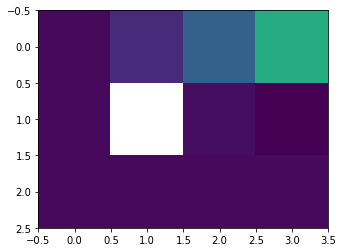

[[ 2.6214400e-01  7.3728000e-01  1.5656960e+00  2.9520000e+00]
 [ 0.0000000e+00           -inf  9.2160000e-02 -9.8434304e+01]
 [ 0.0000000e+00  0.0000000e+00  3.2768000e-02  0.0000000e+00]]


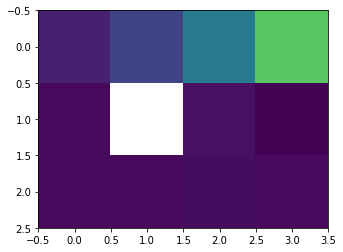

[[ 4.71859200e-01  1.00204544e+00  1.89665280e+00  3.36160000e+00]
 [ 1.67772160e-01            -inf  1.27877120e-01 -9.81033472e+01]
 [ 0.00000000e+00  2.09715200e-02  5.89824000e-02  2.62144000e-03]]


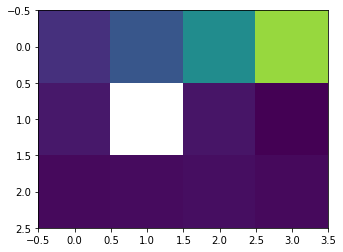

[[ 6.54730854e-01  1.21385779e+00  2.16165417e+00  3.68928000e+00]
 [ 3.01989888e-01            -inf  1.56450816e-01 -9.78383458e+01]
 [ 1.09051904e-01  3.77487360e-02  8.37287936e-02  4.71859200e-03]]


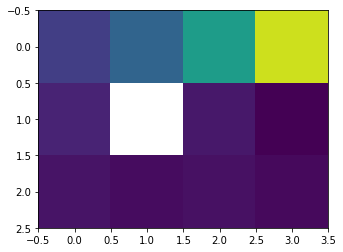

[[ 8.01028178e-01  1.38345867e+00  2.37365527e+00  3.95142400e+00]
 [ 4.19027747e-01            -inf  1.79630637e-01 -9.76263447e+01]
 [ 1.96293427e-01  6.97932186e-02  1.03525908e-01  6.69830349e-03]]


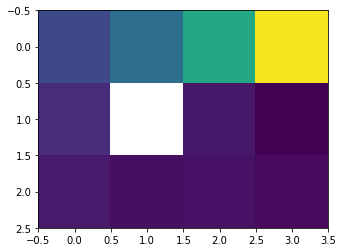

[[ 9.18935768e-01  1.51913937e+00  2.54328181e+00  4.16113920e+00]
 [ 5.12658034e-01            -inf  1.98174494e-01 -9.74567182e+01]
 [ 2.73761215e-01  1.25627793e-01  1.21082929e-01  8.28207268e-03]]


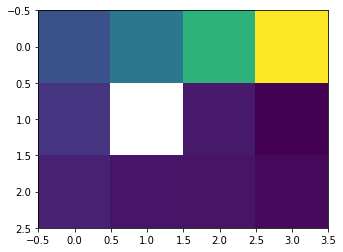

[[ 1.01326184e+00  1.62770036e+00  2.67898305e+00  4.32891136e+00]
 [ 5.88118891e-01            -inf  2.13149179e-01 -9.73210170e+01]
 [ 3.38151365e-01  1.75207178e-01  1.37544465e-01  9.68663436e-03]]


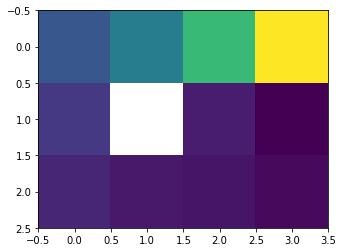

[[ 1.08877774e+00  1.71454915e+00  2.78755520e+00  4.46312909e+00]
 [ 6.48487577e-01            -inf  2.25322201e-01 -9.72124448e+01]
 [ 3.90412665e-01  2.16416874e-01  1.51206980e-01  1.10035572e-02]]


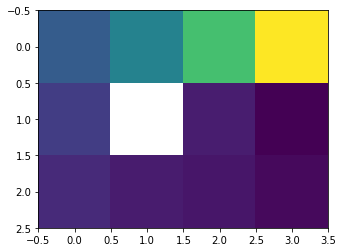

In [4]:
value = np.zeros_like(rewards)
for _ in range(10):
    new_value = np.zeros_like(value)
    for pos in np.ndindex(value.shape):
        new_value[pos] = calc_new_value(pos, value, movable)
    value = new_value
    print(value)
    plt.imshow(value, norm=Normalize(-0.1, 4))
    plt.show()

In [5]:
def calc_best_action(pos, value, movable):
    return np.argmax([
        action_value(pos, action, movable)
        for action in actions
    ]) if valid_pos(pos, movable) else -1

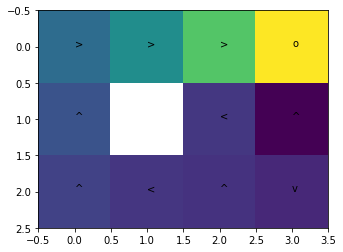

In [6]:
plt.imshow(value, norm=Normalize(-0.5, 4))
best_action = np.zeros_like(value).astype(np.int)
for pos in np.ndindex(value.shape):
    best_action[pos] = calc_best_action(pos, value, movable)
    plt.text(pos[1], pos[0], action_label[best_action[pos]])